In [39]:
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as interp
import glob
import cv2

In [40]:
round = 'round_0'
vehicle_id = 260
vehicle = f'vehicle_{vehicle_id}'
filter_radius = 50 #meters

agent_maps = glob.glob(f'../agent_maps/{round}_{vehicle}*.csv.gz')

agent_maps.sort()


df1 = pd.read_csv(agent_maps[0],compression='gzip')

filtered_agents = df1.query(f'abs(pos_x)<{filter_radius} & abs(pos_y)<{filter_radius}')

In [37]:
filtered_agents

,index,frame_id,id,type_id,pos_x,pos_y,pos_z,roll,pitch,yaw,...,angular_vel_x,angular_vel_y,angular_vel_z,bbox3d_offset_x,bbox3d_offset_y,bbox3d_offset_z,bbox3d_extent_x,bbox3d_extent_y,bbox3d_extent_z,traffic_light_color
11,11,0,22,traffic.unknown,47.668526,-48.284208,1.000000,0.000000e+00,0.000000,-82.457512,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,0,23,traffic.unknown,34.404743,-9.519572,1.000000,0.000000e+00,0.000000,-20.000546,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,0,42,traffic.traffic_light,-4.873639,-11.998590,0.025548,0.000000e+00,0.000000,0.000153,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Red
57,57,0,53,traffic.traffic_light,-17.084979,34.597227,0.109092,0.000000e+00,0.000000,-179.999954,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Green
73,73,0,260,vehicle.toyota.prius,0.000000,0.000000,0.083788,-5.767822e-03,0.043358,0.306748,...,0.117105,-1.163230,3.229765e-01,0.000000,0.000000,0.710000,2.269167,1.000565,0.768681,NaN
101,101,0,274,vehicle.mini.cooperst,-48.465503,15.077633,0.089224,0.000000e+00,0.000000,0.294608,...,0.000062,0.000002,-1.537442e-08,0.000000,0.000000,0.690000,1.901096,0.987017,0.737500,NaN
107,107,0,83,traffic.traffic_light,3.674242,4.242381,0.152404,0.000000e+00,0.000000,94.999969,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Red
109,109,0,84,traffic.traffic_light,-31.761564,0.291897,0.152401,0.000000e+00,0.000000,-89.999939,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Red
112,112,0,283,vehicle.nissan.micra,-28.242542,5.120901,0.065182,2.034643e-03,0.010320,-179.705185,...,0.118891,0.619648,1.040188e-02,0.000000,-0.059209,0.770000,1.834424,0.928076,0.761607,NaN
123,123,0,294,vehicle.tesla.model3,-10.330375,25.284348,0.137823,-1.334047e-08,0.356591,89.843742,...,0.000000,0.000000,0.000000e+00,0.030725,-0.005984,0.747461,2.404411,1.084753,0.761591,NaN


In [36]:
cv2.arrowedLine?

Docstring:
arrowedLine(img, pt1, pt2, color[, thickness[, line_type[, shift[, tipLength]]]]) -> img
.   @brief Draws a arrow segment pointing from the first point to the second one.
.   
.   The function cv::arrowedLine draws an arrow between pt1 and pt2 points in the image. See also #line.
.   
.   @param img Image.
.   @param pt1 The point the arrow starts from.
.   @param pt2 The point the arrow points to.
.   @param color Line color.
.   @param thickness Line thickness.
.   @param line_type Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.
.   @param tipLength The length of the arrow tip in relation to the arrow length
Type:      builtin_function_or_method


<AxesSubplot:xlabel='pos_x', ylabel='pos_y'>

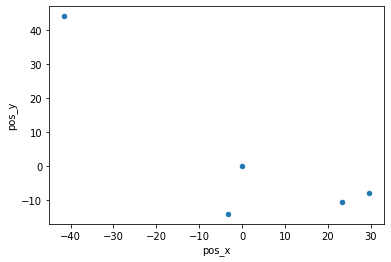

In [22]:
filtered_agents.plot.scatter(x='pos_x',y='pos_y')

In [67]:
# for frames I to I+100
i = 10
start_frame = 10
df_array = []
frame_length = 100
for k in range(frame_length):
    frame_id = i+k
    round = 'round_0'
    vehicle_id = 260
    vehicle = f'vehicle_{vehicle_id}'
    filter_radius = 50 #meters

    agent_maps = glob.glob(f'agent_maps/{round}_{vehicle}*.csv.gz')

    agent_maps.sort(key=lambda st: int(st[st.rfind("frame_") + 6 : st.rfind("csv") - 1]))


    df1 = pd.read_csv(agent_maps[frame_id],compression='gzip')

    filtered_agents = df1.query(f'abs(pos_x)<{filter_radius} & abs(pos_y)<{filter_radius}')
    df_array.append(filtered_agents)

In [68]:
df_merged = pd.concat(df_array)

In [69]:
df_merged

,index,frame_id,id,type_id,pos_x,pos_y,pos_z,roll,pitch,yaw,...,angular_vel_x,angular_vel_y,angular_vel_z,bbox3d_offset_x,bbox3d_offset_y,bbox3d_offset_z,bbox3d_extent_x,bbox3d_extent_y,bbox3d_extent_z,traffic_light_color
0,1126,10,42,traffic.traffic_light,-5.060979,-11.920561,0.025548,0.000000,0.000000,0.000153,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Red
11,1137,10,53,traffic.traffic_light,-16.544097,34.860044,0.109092,0.000000,0.000000,-179.999954,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Green
27,1153,10,260,vehicle.toyota.prius,0.000000,0.000000,0.031796,-0.026947,0.136454,0.322345,...,0.001246,0.005720,-1.052247e-04,0.0,0.000000,0.710000,2.269167,1.000565,0.768681,NaN
55,1181,10,274,vehicle.mini.cooperst,-48.225243,15.832254,0.041469,0.000000,0.000000,0.294608,...,-0.000027,0.000003,3.819310e-10,0.0,0.000000,0.690000,1.901096,0.987017,0.737500,NaN
61,1187,10,83,traffic.traffic_light,3.739167,4.185116,0.152404,0.000000,0.000000,94.999969,...,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11898,109,297,vehicle.bmw.grandtourer,39.406563,33.337939,0.130227,-0.001373,-1.306574,-90.280251,...,-3.916847,0.025979,4.233256e-04,0.0,0.000000,0.760000,2.319544,1.129661,0.839089,NaN
81,11899,109,298,vehicle.audi.tt,6.389344,48.592857,-0.120027,-0.046387,-0.683196,-90.060677,...,-0.054380,0.228572,-4.249095e-02,0.0,0.000000,0.704375,2.073613,1.001602,0.691211,NaN
82,11900,109,299,vehicle.mercedes-benz.coupe,-37.218819,-35.518233,0.128912,-0.113556,0.403992,-144.554901,...,-0.153297,-0.099093,1.561323e+01,0.0,0.000000,0.680000,2.521893,1.081499,0.820067,NaN
90,11908,109,307,vehicle.nissan.micra,40.599955,-49.754895,-0.013400,0.000817,-0.169887,90.704247,...,-0.004730,-0.001551,-7.231806e-02,0.0,-0.059209,0.770000,1.834424,0.928076,0.761607,NaN


In [70]:
df_merged = df_merged.reset_index()

In [71]:
gp = df_merged.groupby("id")

In [72]:
agent_tracks = {}
agent_track_len = {}
for agent_id in gp.groups:
    sub_df = df_merged.iloc[gp.groups[agent_id]]
    tracks = [[-1,-1] for _ in range(frame_length)]
    track_len = 0
    for idx,row in sub_df.iterrows():
        frame_idx = row.frame_id - start_frame
        tracks[frame_idx] = [row.pos_x,row.pos_y]
        track_len+=1
    agent_tracks[agent_id] = np.array(tracks)
    agent_track_len[agent_id] =track_len

In [73]:
agent_tracks.keys()

dict_keys([42, 53, 83, 84, 260, 263, 268, 274, 283, 286, 292, 294, 295, 297, 298, 299, 305, 307, 309, 312, 323])

In [74]:
agent_track_len

{42: 100,
 53: 75,
 83: 100,
 84: 65,
 260: 100,
 263: 65,
 268: 6,
 274: 86,
 283: 43,
 286: 1,
 292: 34,
 294: 60,
 295: 54,
 297: 57,
 298: 100,
 299: 6,
 305: 1,
 307: 5,
 309: 58,
 312: 83,
 323: 19}

In [77]:
agent_ids = list(agent_track_len.keys())
agent_ids.sort(key=lambda x:agent_track_len[x],reverse=True)
agent_ids

[42,
 83,
 260,
 298,
 274,
 312,
 53,
 84,
 263,
 294,
 309,
 297,
 295,
 283,
 292,
 323,
 268,
 299,
 307,
 286,
 305]